In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 
%load_ext memory_profiler
from sklearn.metrics import make_scorer
from scipy.special import expit
import time
import math
import random
from memory_profiler import memory_usage
from sklearn import metrics as mt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc


from scipy import interp

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

target_classifier = 'PC'
df = pd.read_csv('responses.csv', sep=",")

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [2]:
# remove rows whose target classfier value is NaN
df_cleaned_classifier = df[np.isfinite(df[target_classifier])]
# change NaN number values to the mean
df_imputed = df_cleaned_classifier.fillna(df.mean())
# get categorical features
object_features = list(df_cleaned_classifier.select_dtypes(include=['object']).columns)
# one hot encode categorical features
one_hot_df = pd.concat([pd.get_dummies(df_imputed[col],prefix=col) for col in object_features], axis=1)
# drop object features from imputed dataframe
df_imputed_dropped = df_imputed.drop(object_features, 1)
frames = [df_imputed_dropped, one_hot_df]
# concatenate both frames by columns
df_fixed = pd.concat(frames, axis=1)

In [3]:
# Research on Cost Matrix
# http://www.ibm.com/support/knowledgecenter/SSEPGG_11.1.0/com.ibm.im.model.doc/c_cost_matrix.html

cost_matrix = np.matrix([[0,1,2,3,4],
[1,0,1,2,3],
[3,1,0,1,2],
[5,3,1,0,1],
[7,5,2,1,0]])

def get_confusion_costTot(confusion_matrix, cost_matrix):
    score = np.sum(confusion_matrix*cost_matrix)
    return score

confusion_scorer = make_scorer(get_confusion_costTot, greater_is_better=False)
confusion_scorer

make_scorer(get_confusion_costTot, greater_is_better=False)

In [4]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if target_classifier in df_fixed:
    y = df_fixed[target_classifier].values # get the labels we want
    del df_fixed[target_classifier] # get rid of the class label
    X = df_fixed.values # use everything else to predict!

X = X/5
num_folds = 10

cv_object = StratifiedKFold(n_splits= num_folds, random_state=None, shuffle=True)
cv_object.split(X,y)

print(cv_object)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [5]:
for train_indices, test_indices in cv_object.split(X,y): 
        # I will create new variables here so that it is more obvious what 
        # the code is doing (you can compact this syntax and avoid duplicating memory,
        # but it makes this code less readable)
        X_train = (X[train_indices])
        y_train = y[train_indices]

    #     print(X_train)
    #     print(y_train)

        X_test = (X[test_indices])
        y_test = y[test_indices]

In [6]:



clf = MLPClassifier() # adam numerical stabilizer
    



In [7]:
from sklearn.ensemble import BaggingClassifier

class MyEnsemble():
    
    def __init__(self, c, num_c, max_s, v):
        self.Ensemble = BaggingClassifier(base_estimator= c,
                                    n_estimators = num_c,
                                     max_samples = max_s,
                                     verbose = v)
    def predict(self, X):
        return self.Ensemble.predict(X)
    def predict_proba(self,X):
        return self.Ensemble.predict_proba(X)
    def fit(self, X,y):
        return self.Ensemble.fit(X,y)

In [8]:
num_instances = 10


ensemble = MyEnsemble(clf, 10,y_train.shape[0],False)

ensemble.fit(X_train,y_train)
y_hat=ensemble.predict(X_test)
# print(y_hat)
print(mt.confusion_matrix(y_hat,y_test))

print(X_train.shape)

[[ 1  3  2  1  0]
 [ 5  6  4  1  3]
 [ 7  7 10 11  1]
 [ 0  3  7  3  4]
 [ 0  1  2  4 12]]
(906, 172)


In [9]:
y_hat.shape

(98,)

In [10]:
np.equal(y_hat, y_test)

array([False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False,  True, False,  True, False, False], dtype=bool)

In [11]:
fpr, tpr,thresholds = roc_curve(np.equal(y_hat, y_test),y_hat)

In [12]:
 acc = mt.accuracy_score(y_test,y_hat)
            #         lr_clf_accuracies.append(acc)
            #         cost_accuracies.append([acc])

conf = mt.confusion_matrix(y_test,y_hat)

In [13]:
conf

array([[ 1,  5,  7,  0,  0],
       [ 3,  6,  7,  3,  1],
       [ 2,  4, 10,  7,  2],
       [ 1,  1, 11,  3,  4],
       [ 0,  3,  1,  4, 12]])

In [14]:
score = get_confusion_costTot(conf, cost_matrix)

In [15]:
score

910

In [16]:
from sklearn import __version__ as sklearn_version
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


vals = {'n_hidden':150, 
         'C':0.002, 'epochs':75, 'eta':0.001, 
         'alpha':0.0, 'decrease_const':1e-9, 'minibatches':200,
         'shuffle':True,'random_state':1, 
           'nonlinearity': "sigmoid"}
custom_performances = []
custom_times = []
custom_mem = []
sk_performances = []
sk_times = []
sk_mem = []
for train_indices, test_indices in cv_object.split(X,y): 
            
            # I will create new variables here so that it is more obvious what 
            # the code is doing (you can compact this syntax and avoid duplicating memory,
            # but it makes this code less readable)
            X_train = (X[train_indices])
            y_train = y[train_indices]

            X_test = (X[test_indices])
            y_test = y[test_indices]

 
            clf = MLPClassifier(hidden_layer_sizes=(50, ), 
                        activation='relu', # type of non-linearity, every layer
                        solver='sgd', 
                        alpha=1e-4, # L2 penalty
                        batch_size= 'auto', # min of 200, num_samples
                        learning_rate='constant', # adapt learning? only for sgd
                        learning_rate_init=0.1, # only SGD
                        power_t=0.0,    # only SGD with inverse scaling of learning rate
                        max_iter=75, # stopping criteria
                        shuffle=True, 
                        random_state=1, 
                        tol=0, # for stopping
                        verbose=False, 
                        warm_start=False, 
                        momentum=0.9, # only SGD
                        nesterovs_momentum=False, # only SGD
                        early_stopping=False, 
                        validation_fraction=0.0, # only if early_stop is true
                        beta_1=0.9, # adam decay rate of moment
                        beta_2=0.999, # adam decay rate of moment
                        epsilon=1e-08) # adam numerical stabilizer
            
            print("SCIKIT*****")
            
            st = time.time()

            mem = memory_usage((clf.fit,(X_train,y_train))) # train object
            t = (time.time() -st)
            sk_times.append(t)
            sk_mem.append(mem[0])
#             %time clf.fit(X_train,y_train)
            yhat2 = clf.predict(X_test)
            print('Validation Acc:',accuracy_score(yhat2,y_test))
            conf2 = mt.confusion_matrix(y_test,yhat2)
                    #             print(vals)
            #                     print_result(nn_long_sigmoid,X_train,y_train,X_test,y_test,title="Long Run",color="red")
            #                     plt.show()
            print("confusion matrix\n",conf2)
            score = get_confusion_costTot(conf2, cost_matrix)
            print("Weighted Confusion Matrix Score: ", score)
            sk_performances.append(score)

SCIKIT*****
Validation Acc: 0.245098039216
confusion matrix
 [[ 0  0 14  0  0]
 [ 0  0 21  0  0]
 [ 0  0 25  0  0]
 [ 0  0 21  0  0]
 [ 0  0 21  0  0]]
Weighted Confusion Matrix Score:  714
SCIKIT*****
Validation Acc: 0.245098039216
confusion matrix
 [[ 0  1 13  0  0]
 [ 0  0 21  0  0]
 [ 0  0 25  0  0]
 [ 0  0 21  0  0]
 [ 0  0 21  0  0]]
Weighted Confusion Matrix Score:  714
SCIKIT*****
Validation Acc: 0.245098039216
confusion matrix
 [[ 0  0 14  0  0]
 [ 0  0 21  0  0]
 [ 0  0 25  0  0]
 [ 0  0 21  0  0]
 [ 0  0 21  0  0]]
Weighted Confusion Matrix Score:  714
SCIKIT*****
Validation Acc: 0.245098039216
confusion matrix
 [[ 0  0 14  0  0]
 [ 0  0 21  0  0]
 [ 0  0 25  0  0]
 [ 0  0 21  0  0]
 [ 0  0 21  0  0]]
Weighted Confusion Matrix Score:  714
SCIKIT*****
Validation Acc: 0.247524752475
confusion matrix
 [[ 0  0 14  0  0]
 [ 0  0 21  0  0]
 [ 0  0 25  0  0]
 [ 0  0 21  0  0]
 [ 0  0 20  0  0]]
Weighted Confusion Matrix Score:  707
SCIKIT*****
Validation Acc: 0.25
confusion matrix


## Comparing ROCs and AUCs

### Ensemble Classifier

/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


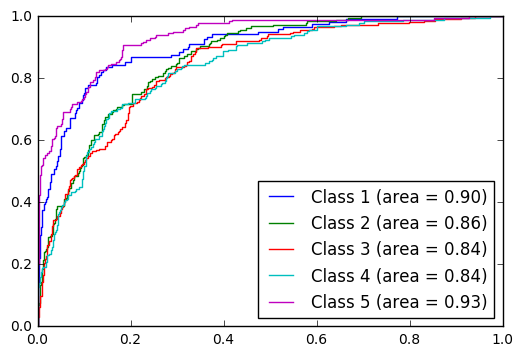

In [23]:
aucs = []
fprs = []
tprs = []
#classifier.fit(X_train,y_train)
#     probas = pipe_lr.fit(X_train[train],
#                          y_train[train]).predict_proba(X_train[test])
#     #ind_yhat = classifier.predict(X_test)
ind_yhat = ensemble.predict_proba(X_train)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
perclass_mean_tpr = 0.0
roc_auc = 0
classes = np.unique(y_train)
    # get the mean fpr and tpr, per class
for j in classes:
    fpr, tpr, thresholds = roc_curve(y_train,
                                     ind_yhat[:,j-1],
                                     pos_label=j)
    perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
    perclass_mean_tpr[0] = 0.0 
    roc_auc += auc(fpr, tpr)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc(fpr, tpr))
plt.figure()
for i in range(0,5):
    plt.plot(fprs[i],tprs[i],label='Class %d (area = %0.2f)'
               % (i+1, aucs[i]))
    plt.legend(loc='best')
#     perclass_mean_tpr /= len(classes)
#     roc_auc /= len(classes)
#     aucs.append(roc_auc)
#     mean_tpr += perclass_mean_tpr
#     plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold (area = %0.2f)'
#                    % ( roc_auc))
# #     mean_tpr /= K
#     mean_auc = auc(mean_fpr, mean_tpr)
#     plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
#                        % (mean_auc)`b)
#     plt.legend(loc='best')
plt.show()

### Individual Classifiers

/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


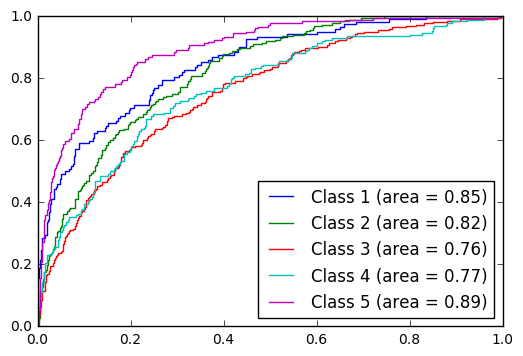

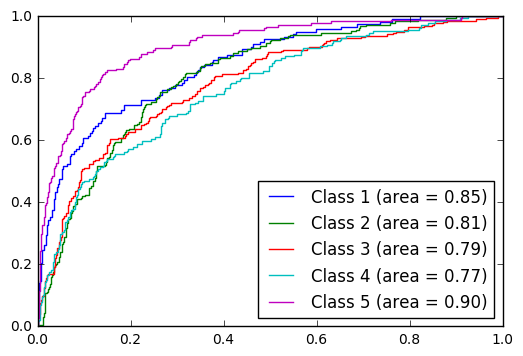

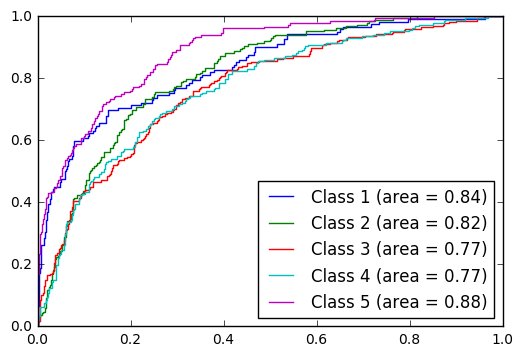

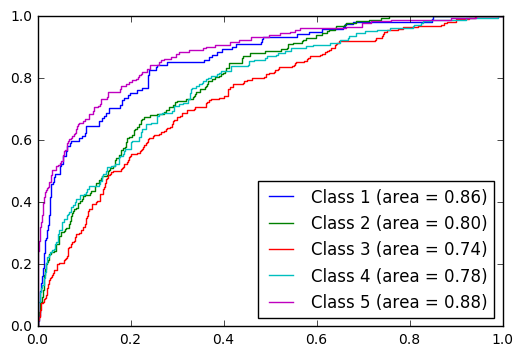

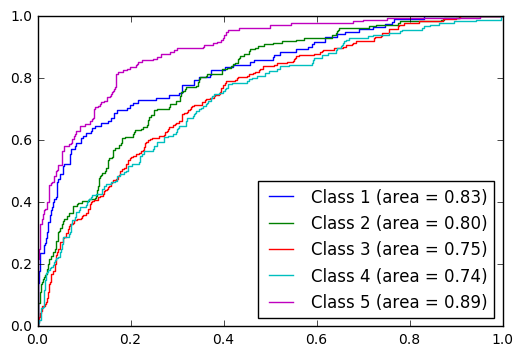

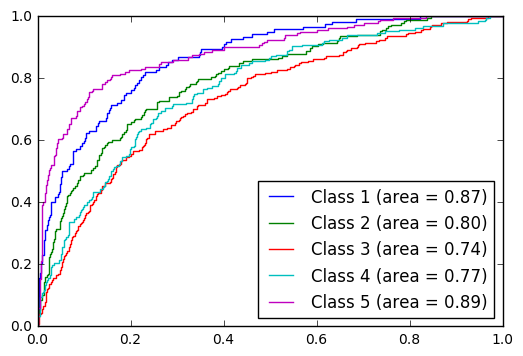

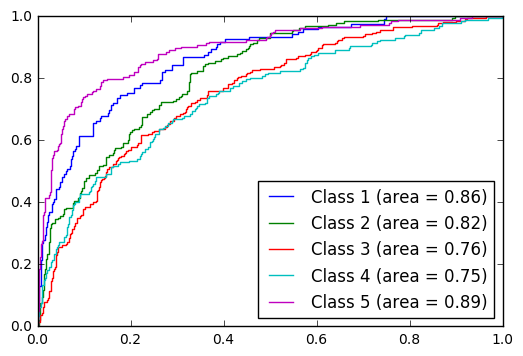

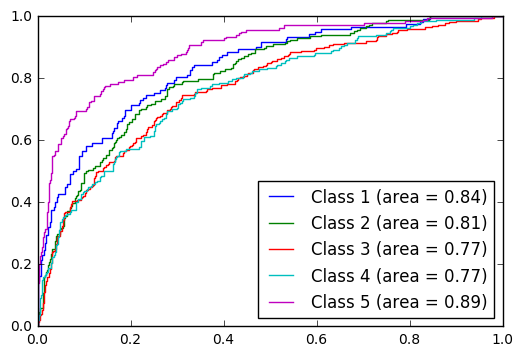

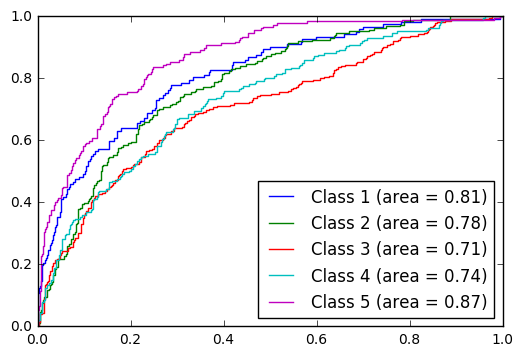

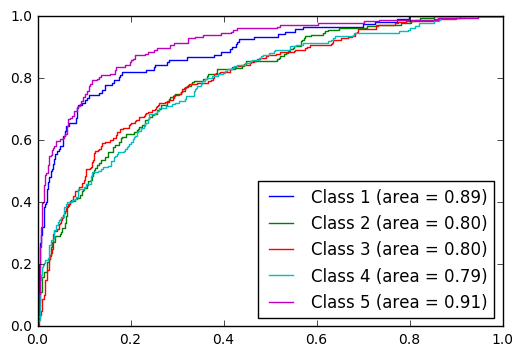

In [22]:
i = 0

for classifier in ensemble.Ensemble.estimators_:
    aucs = []
    fprs = []
    tprs = []
    #classifier.fit(X_train,y_train)
#     probas = pipe_lr.fit(X_train[train],
#                          y_train[train]).predict_proba(X_train[test])
#     #ind_yhat = classifier.predict(X_test)
    ind_yhat = classifier.predict_proba(X_train)
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train)
        # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train,
                                         ind_yhat[:,j-1],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0 
        roc_auc += auc(fpr, tpr)
        fprs.append(fpr)
        tprs.append(tpr)
        aucs.append(auc(fpr, tpr))
    plt.figure()
    for i in range(0,5):
        plt.plot(fprs[i],tprs[i],label='Class %d (area = %0.2f)'
                   % (i+1, aucs[i]))
        plt.legend(loc='best')
#     perclass_mean_tpr /= len(classes)
#     roc_auc /= len(classes)
#     aucs.append(roc_auc)
#     mean_tpr += perclass_mean_tpr
#     plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold (area = %0.2f)'
#                    % ( roc_auc))
# #     mean_tpr /= K
#     mean_auc = auc(mean_fpr, mean_tpr)
#     plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
#                        % (mean_auc)`b)
#     plt.legend(loc='best')
    plt.show()


In [ ]:
Based on the graphs, 

In [ ]:
print(ind_yhat.shape())
print(y.shape())

In [ ]:
aucs

In [ ]:
# Great! Its seems we are also maxing out the F1 score, lets go with C==1e-3


K = 4

if sklearn_version < '0.18':
    from sklearn.cross_validation import StratifiedKFold
    kfold = StratifiedKFold(y=y_train, 
                            n_folds=K,
                            random_state=1)
else:
    from sklearn.model_selection import StratifiedKFold
    kfold = StratifiedKFold(n_splits=K,
                            random_state=1).split(X_train, y_train)


mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = pipe_lr.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train[train])
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= K
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.legend(loc='best')
plt.grid()